# Importing necessary modules

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
%matplotlib inline

# Reading the dataset

In [36]:
df=pd.read_csv('Data_Science_Internship - Dump.csv', index_col=0)

In [37]:
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [38]:
df.dtypes

Agent_id          object
status            object
lost_reason       object
budget            object
lease             object
movein            object
source            object
source_city       object
source_country    object
utm_source        object
utm_medium        object
des_city          object
des_country       object
room_type         object
lead_id           object
dtype: object

Notes: '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN 

In [39]:
df=df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

In [40]:
df.isna().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source             5977
source_city        8851
source_country     8641
utm_source           61
utm_medium         3187
des_city           2537
des_country        2537
room_type         23547
lead_id               0
dtype: int64

Note: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.

In [41]:
df.status.unique()

array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

# Removing records that have other records other than 'won' and 'lost'

In [42]:
df=df[(df.status =='LOST')|( df.status=='WON')]

# Manually Label Encoding Target Variable

In [43]:
df['status']=list(map(lambda x: 1 if x=='WON' else 0, df['status']))

In [44]:
df.shape

(46317, 15)

# Dropping duplicates

In [45]:
df=df.drop_duplicates()

In [46]:
df.shape

(46307, 15)

# Inspect columns

In [47]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

'Agent_id': Unique Identifier of Agent responsible for dealing with the client, 

'status': Present status of the lead, 

'lost_reason': Reason why they lost the lead, 

'budget': Budget of the lead, 

'lease': Lease duration lead is willing to engage in (assuming the numbers without any text represent weeks), 

'movein': Move in date ,

'source', 'source_city', 'source_country', : Source address of the lead

'utm_source', 'utm_medium',
       
 'des_city', 'des_country': address where the lead is about to move in, 
 
 'room_type': type of room lead is interested in, 
 
 'lead_id': unique identifier of a lead

# check number of unique values

In [48]:
df.nunique()

Agent_id            120
status                2
lost_reason          30
budget             1851
lease               311
movein              469
source              682
source_city        4315
source_country      184
utm_source           34
utm_medium           63
des_city            219
des_country          14
room_type             5
lead_id           30491
dtype: int64

# Distribution of target variable

<AxesSubplot:xlabel='status', ylabel='count'>

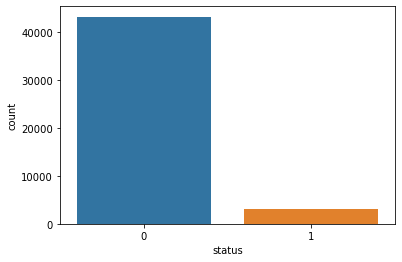

In [49]:
sns.countplot(data=df,x='status')

# Plan of action

we are going to create a logistic regression model that can classify our records into WON or LOST. and we can use it to give us a probability which we can use for Lead Score

# Hypothesis
1. Some agents might have better success rate than others
2. budget might be a strong reason for a lead to final the deal or not
3. lease and des_city might be a influential factor in deciding to forward with a deal or not
4. room type may also be a reason when combined with budget

# As the dataset is imbalanced, Separating dataset into majority and minority

In [50]:
df_majority=df[df.status==0]
df_minority=df[df.status==1]

In [51]:
cols=df.columns
for col in cols:
    print('\n',col,'\n', 'majority dataset',end=":")
    print(df_majority[col].nunique())
    print(' minority_dataset',end=":")
    print(df_minority[col].nunique())


 Agent_id 
 majority dataset:120
 minority_dataset:73

 status 
 majority dataset:1
 minority_dataset:1

 lost_reason 
 majority dataset:30
 minority_dataset:0

 budget 
 majority dataset:1769
 minority_dataset:346

 lease 
 majority dataset:301
 minority_dataset:77

 movein 
 majority dataset:466
 minority_dataset:124

 source 
 majority dataset:637
 minority_dataset:168

 source_city 
 majority dataset:4191
 minority_dataset:779

 source_country 
 majority dataset:182
 minority_dataset:105

 utm_source 
 majority dataset:32
 minority_dataset:23

 utm_medium 
 majority dataset:62
 minority_dataset:30

 des_city 
 majority dataset:219
 minority_dataset:60

 des_country 
 majority dataset:14
 minority_dataset:5

 room_type 
 majority dataset:5
 minority_dataset:3

 lead_id 
 majority dataset:29425
 minority_dataset:3005


# columns to consider
1. Agent_id
2. Budget
3. Lease
4. source_city
5. utm_medium
6. des_city
7. des_country
5. room_type

In [52]:
df[(df.status==1) & (df.lost_reason.isna()==False)]

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id


# Candidates with status as WON has  NULL in lost_reason it is a calssic case of causation and nor correlation. So even though this column is highly related we will discard it in training our model

In [53]:
df.budget.value_counts()

£60 - £120 Per week     9750
£121 - £180 Per Week    8878
0-0                     5719
£181 - £240 Per Week    2143
100                     1509
                        ... 
0-80-100$                  1
0-235                      1
£120-160 Per Week          1
1400 per month             1
0-500 PCM                  1
Name: budget, Length: 1851, dtype: int64

In [54]:
df[df.budget=='£121 - £180 Per Week'].status.value_counts(1)

0    0.92825
1    0.07175
Name: status, dtype: float64

In [55]:
df.budget.value_counts()[df.budget.value_counts().values>50]

£60 - £120 Per week     9750
£121 - £180 Per Week    8878
0-0                     5719
£181 - £240 Per Week    2143
100                     1509
150                     1086
£241 - £300 Per week     709
> 300£ Per Week          693
200                      643
120                      549
130                      417
160                      385
110                      377
180                      359
140                      358
250                      314
170                      288
500                      276
300                      268
190                      223
0-100                    217
220                      144
80                       119
0-150                    110
60                       109
90                       103
210                       99
230                       99
450                       94
350                       85
0-120                     80
125                       73
280                       72
400                       72
0-130         

# budget column 

In [56]:
def assign_budget(budget):
    nums=[]
    
    if budget=='unavailable':
        return('unavailable')
    temp=re.findall('\d*',budget)
    
    
    for item in temp:
        if item!='':
            nums.append(int(item))
            
    if len(nums)==0:
        return '0-60'
           
    high=max(nums)
    
    if high<=60:
        return '0-60'
    elif high>60 and high<=120:
        return '61-120'
    elif high>120 and high<=180:
        return '121-180'
    elif high>180 and high<=240:
        return '181-240'
    elif high>240 and high<=300:
        return '240-300'
    elif high>300:
        return '>300'
    else:
        return 'other'
        

# Checking if null budget values have any big significance in determining success

<AxesSubplot:xlabel='status', ylabel='count'>

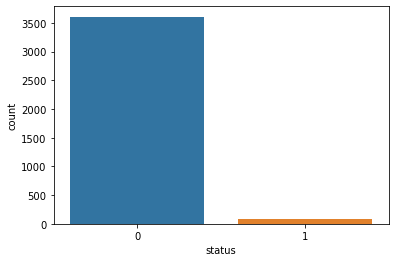

In [59]:
sns.countplot(data=df[df.budget.isna()],x='status')

In [60]:
budget_mode=df.budget.mode()[0]
df['budget'].fillna(budget_mode, inplace=True)

In [61]:
df['budget']=df['budget'].apply(assign_budget)


<AxesSubplot:xlabel='budget', ylabel='count'>

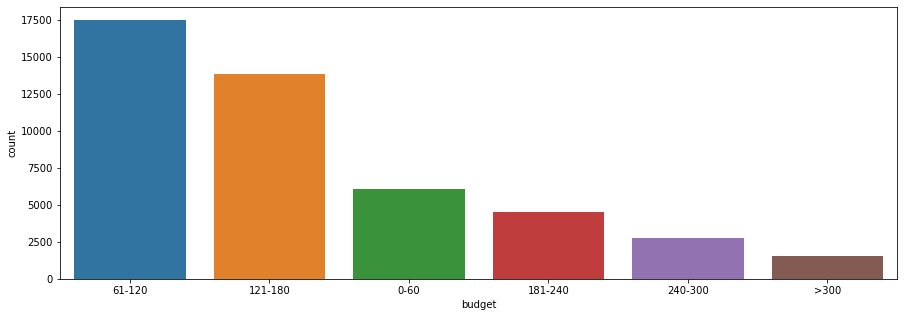

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='budget')

# utm_medium column

In [63]:
df[df.utm_medium.isna()==False].status.value_counts(1), df[df.utm_medium.isna()].status.value_counts(1)

(0    0.939732
 1    0.060268
 Name: status, dtype: float64,
 0    0.851398
 1    0.148602
 Name: status, dtype: float64)

# There is significant difference in the status where utm_medium is not present, so we are going to put unavailable tag in place of null values

In [64]:
df['utm_medium'].fillna('unavailable', inplace=True)

In [65]:
df.utm_medium.nunique()

64

# Agent ID

In [66]:
df.Agent_id.value_counts()

2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    8177
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489    1450
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450    1279
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5    1105
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b    1069
                                                                    ... 
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed       1
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d       1
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28       1
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963       1
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a       1
Name: Agent_id, Length: 120, dtype: int64

In [67]:
df.Agent_id.isna().sum()

0

# no null values

In [68]:
df.lease.nunique()

311

In [69]:
df.lease.value_counts()[df.lease.value_counts().values>50]

Full Year Course Stay 40 - 44 weeks           11000
0                                              7533
Complete Education Year Stay 50 - 52 weeks     6451
51                                             3949
Semester Stay 20 - 24 weeks                    2753
Summer/Short Stay 8 - 12 weeks                 2248
lease                                          1644
full-course-stay                               1217
full-year-stay                                  956
Other                                           932
44                                              840
51 weeks                                        572
semester-stay                                   470
short-stay                                      450
44 weeks                                        275
other                                           169
45                                              147
43                                              136
1                                                90
1 year      

In [70]:
df.lease.value_counts()[df.lease.value_counts().values<50]

294                  44
3                    44
17                   36
41                   35
25                   30
                     ..
36-40 weeks           1
12 month              1
44 weeks/51 weeks     1
full year stayt       1
78                    1
Name: lease, Length: 279, dtype: int64

In [71]:
df[df.lease.isna()].status.value_counts(1),df[df.lease.isna()==False].status.value_counts(1)

(0    0.976007
 1    0.023993
 Name: status, dtype: float64,
 0    0.931412
 1    0.068588
 Name: status, dtype: float64)

In [72]:
df['lease']=df['lease'].fillna('unavailable')

In [73]:
def find_week_slab(weeks):
    if weeks>=52:
        return('1 year or more')
    elif weeks>=39 and weeks<52:
        return('9 months - 1 year')
    elif weeks>=26 and weeks<39:
        return('6 months - 9 months')
    elif weeks>=13 and weeks<26:
        return('3 months - 6 months')
    elif weeks<13:
        return('less than 3 months')
    else:
        return('Other')

In [74]:
def categorize_lease_term(lease):
    if lease=='unavailable':
        return 'unavailable'
    nums=[]
    #print(lease)
    if re.search('year',lease)!=None or re.search('course',lease)!=None :
        return('1 year or more')
        
    elif re.search('month',lease)!=None:
        temp=re.findall('\d*',lease)
        for item in temp:
            if item!='':
                nums.append(int(item))
            
            return(find_week_slab(round(max(nums)*4.3)))
    
    else:
        
        temp=re.findall('\d*',lease)
    
        for item in temp:
            if item!='':
                nums.append(int(item))

        if len(nums)==0:
            return 'Other'

        high=max(nums)
        return(find_week_slab(max(nums)))
        

In [75]:
df['lease']=df['lease'].apply(categorize_lease_term)


# New value counts

In [83]:
df.lease.unique()

array(['unavailable', '9 months - 1 year', 'less than 3 months', 'Other',
       '3 months - 6 months', '1 year or more', '6 months - 9 months'],
      dtype=object)

<AxesSubplot:xlabel='lease', ylabel='count'>

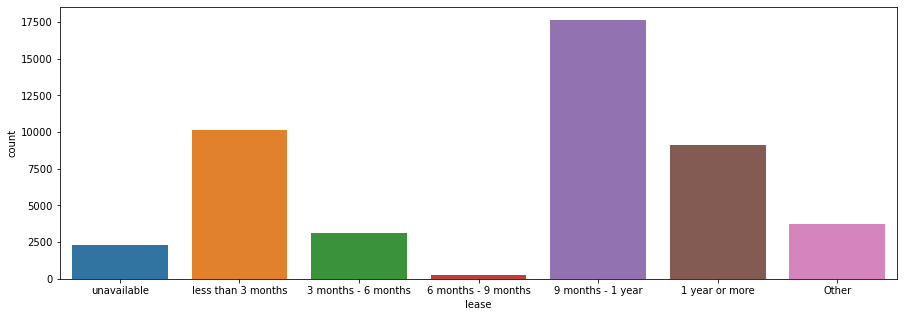

In [88]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='lease', order=['unavailable',  'less than 3 months','3 months - 6 months',
                                       '6 months - 9 months','9 months - 1 year', '1 year or more','Other'])

# DES_CITY

In [41]:
df.des_city.nunique()

219

In [42]:
df.des_city.isna().sum()

2528

In [43]:
df[df.des_city.isna()].status.value_counts(1),df[df.des_city.isna()==False].status.value_counts(1)

(0    0.976266
 1    0.023734
 Name: status, dtype: float64,
 0    0.9312
 1    0.0688
 Name: status, dtype: float64)

In [44]:
df['des_city'].fillna('unavailable', inplace=True)

In [45]:
df.des_city.value_counts()

ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    7323
810c069040f6a9b16fdf976a901755508a87cb0224b169d4b5d803357e647947    3448
11ab03a1a8c367191355c152f39fe28cae5e426fce49efb320230ca4ae3f97a1    3105
unavailable                                                         2528
8593b9db65212160979d946950601c26622a219c80f1f122679eb69ec5b96600    2007
                                                                    ... 
6b9031df058346a877deaba0a830b576fa81b9da8692e183e4eb4c9dc949054c       1
829228a55ddc193d4f48f1249126cd689365f5f7fe55383ead8afc2b8676de8c       1
b9ae62ede2dad179198540d5a84bf5e432f8f36c370d906b9a8224d04582d9d0       1
80aa149d3dedd651f836d1071659255aa4843801d79d5df18ddb8d5df1dcf32d       1
806b1459b451fcbf14da3e1f61c2e0379e840b0a20badf7f6d4fdc7b3b9329b8       1
Name: des_city, Length: 220, dtype: int64

In [46]:
other_des_cities=df.des_city.value_counts()[df.des_city.value_counts().values<100].index
other_des_cities

Index(['5e5adde0e206420f674e8038b05a79a1448ba265fd0aa81c1bd41af7d4b21dc3',
       '0e45cf44b7167ea44f17eb7802822242e83099d772ee8a05cfb14e5f3db49bae',
       '5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204b8a5836cc50597a6b1',
       'ce061756614dbf72bc78a6134e2f7f16f572a2064f017fd59e6412366eb8d583',
       '5cea8a2076b11069708f9f18c1b190d4110c9c3e66de0676d3054c00f1a4e10e',
       'cda115aaa794db7a082d95711a9c0b23da1762001390d2824280677ee9287ac1',
       'a8d85a214c143174ddace882e59ef72f7123acc15f3a4a0e200587c84d42c8bb',
       'c46f86615011054c8d99e9056f753c972eb3de676d0f376b326389a57e2e2f0f',
       'c153d60ae29ef1a1577a09285cece714e80f02904eb9a244e92d60d199901b9c',
       '7b65c404aa029a3762dd43c796a254c8d40d1ce369bba54e693b3398c9b9341c',
       ...
       '88fa0e9c8ec31bd6ea6bd0738ea669d09a290b9b41c0c77a3ae2211d0c83897b',
       'd19d1ff45a5755d8d5fbe2e3ea0f1dd233e73158f60f9107014b92fe479a22c8',
       'f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f',
       '040b57

In [47]:
df[df.des_city.isin(other_des_cities)].status.value_counts()

0    2041
1      39
Name: status, dtype: int64

In [48]:
df['des_city']=list(map(lambda x: 'Other des cities' if x in other_des_cities else x, df['des_city']))

In [49]:
df.des_city.value_counts()

ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    7323
810c069040f6a9b16fdf976a901755508a87cb0224b169d4b5d803357e647947    3448
11ab03a1a8c367191355c152f39fe28cae5e426fce49efb320230ca4ae3f97a1    3105
unavailable                                                         2528
Other des cities                                                    2080
8593b9db65212160979d946950601c26622a219c80f1f122679eb69ec5b96600    2007
6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b076e10dcbcd6e5096271    1699
5e02dadaa7e4cd29809e2f8a115f1e5e9c01b29813a1fb9707218804218da32a    1596
9b8cc3c63cdf447e463c11544924bf027945cbd29675f77955bb36364356c14e    1569
b2586a6cef5690b74e9fb425f95f8fb3f1e18a4cdc3225eb2f53534ec3602aee    1511
5372372f3bf5896820cb2819300c3e681820d82c6efc548fb07bed3a6c83f451    1486
c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6cf12031691b8e038a23    1459
085c3a49a31cbfa71c36746a98dc908d30d423a63b969c5a5c7cadefcd92492b    1453
bf5ade33b5b472c3599473a5cb4e5c7037e4c73296b7e97006e

# des_country

In [50]:
df['des_country'].isna().sum()

2528

In [51]:
df[df.des_country.isna()].status.value_counts(1),df[df.des_country.isna()==False].status.value_counts(1)

(0    0.976266
 1    0.023734
 Name: status, dtype: float64,
 0    0.9312
 1    0.0688
 Name: status, dtype: float64)

In [52]:
df['des_country'].fillna('unavailable', inplace=True)

In [53]:
df.des_country.value_counts()

8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19    42386
unavailable                                                          2528
02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae      739
80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03      162
be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8      149
7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153      114
c1ef40ce0484c698eb4bd27fe56c1e7b68d74f9780ed674210d0e5013dae45e9       77
5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc       57
49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd       26
abd149214539d9f222d25de6358735b9fa0efd3956f66102b2c119ae2d9f6348       23
8ef41e6f4b07432a0cb4eb7a8774e7a3878fd3e385f49aa09b406768467db228       22
4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d       17
3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7        4
2275583196d791405892aaca0d87743c872f3f

# Source city

In [54]:
df[df.source_city.isna()].status.value_counts(1),df[df.source_city.isna()==False].status.value_counts(1)

(0    0.937989
 1    0.062011
 Name: status, dtype: float64,
 0    0.932642
 1    0.067358
 Name: status, dtype: float64)

In [55]:
df['source_city'].fillna('unavailable', inplace=True)

In [56]:
df['source_city'].value_counts()

unavailable                                                         8821
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    3020
b384863fa1f6e091164b74219726eee0b9dd47776b91a4dc71fd0516630d21ec    1431
9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f418c5d76f12d191f02     854
7d1550b844ff586a6023216c06263105eed0a849a2a1f69bb8862ab288d8cdab     752
                                                                    ... 
67e6f8c1f6f47e01ab6fe1cbbc3d4115d71f63c6ebf82a8713a6ac04a5b5236c       1
c2cedb3b32de2ae419a258d76f4fa82ee302441fbae041acf9a13770dfa18eb0       1
e2f36920bce1be5e4c94b165dcbd09cf454f5990d8869c5cc483e0723e34595c       1
06065eeea31a9f7eeaf11e335f9a6a67235fc40f12d50b06b84fcbcb5ed70dd2       1
d650065b53c2284b98e575d37e1be820599bf33baff5e147770547a984975d2f       1
Name: source_city, Length: 4316, dtype: int64

In [57]:
other_source_cities=df['source_city'].value_counts()[df['source_city'].value_counts().values<100].index
other_source_cities

Index(['467f29d648705d956b83aed4843decf448186a68a2ae1ed0fe77698815239fd8',
       'cad30e1923686fe4450f3305e88ccdaa578b972cb2b67a9fa1d240706d21e4a4',
       '8454f92ff14f1d2c7ea4058f73fbba47dc07da86ec06ff4c80f1f098c4edc999',
       '19372fa44c57a01c37a5a8418779ca3d99b0b59731fb351380c9d648e357ab96',
       'ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3',
       'f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736',
       'ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314',
       '1496126b7015defbc3b1d129a46096a5c135075aff2add706a6af14705e9fe38',
       'bf5ade33b5b472c3599473a5cb4e5c7037e4c73296b7e97006edb71f029133b6',
       '3fc732073e9e859de0d44ea72812d36d018a4a450da27d6ddb8176e09ac87151',
       ...
       '0271fbfbf514cc780e1179007c2914f5147b053459965d0926ff4d2213f31be7',
       'd8ab082fc42d89da0e11d43964a4090e9b3871e238da416b145179bdf6fb8145',
       '410e0736555699d90faf7d70d54212e79e0bea577175e64e37a067a05b67d89d',
       '7fa015

In [58]:
df['source_city']=list(map(lambda x: 'Other Source Cities' if x in other_source_cities else x, df['source_city']))

# Source

In [59]:
df.source.isna().sum()

5946

In [60]:
df[df.source.isna()].status.value_counts(1),df[df.source.isna()==False].status.value_counts(1)

(0    0.971409
 1    0.028591
 Name: status, dtype: float64,
 0    0.928099
 1    0.071901
 Name: status, dtype: float64)

In [61]:
df.source.value_counts()

7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    19092
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916     3794
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b     3586
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549     2209
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     2129
                                                                    ...  
ab4556b4118e9689282ac334ed94636124b8d4a531e2db6c2623eb0437de1ab2        1
ff25c08fc834360514f4fbc6434c2bb381ad04ea984ea86c2a0f5fb6ec94a831        1
fde7c38145e98695f302f2eb113737bcf9e6b3b0ec4ab2723f4d6610cc97813f        1
f4dd29fa0ded5c9ca30c96015bf8147165bfce38964c3842352d7a013b870ac9        1
93bee3e177d17c128e6a6af7b88fd675d7ec729b1a88ae13c582248dfd702378        1
Name: source, Length: 682, dtype: int64

In [62]:
df.source.fillna('unavailable', inplace=True)

In [63]:
other_sources=df['source'].value_counts()[df['source'].value_counts().values<100].index
other_sources

Index(['34fbd3ead861115d5c4b167b42ac12949432632ec3f618ef844d60525dbf2ab1',
       'eb6329d1696196ed1ba71f6cba5356c8bc4fb18b1f989637fa1e5db83019f830',
       '5f74d183397778f1be08cc215d26a5e9d394a865773c8e8aa2f2cd88872930ff',
       '14c1e9997404fd64a464da17c0dd80790490e7b18d32dc9bd5882b411ad4519d',
       '23e5f58a78e01836546d8a3d35a2758be652d2dfa346fe71004e846849e01b74',
       '3e6f3ef30c9311c7086582f5a7f015c3485ba4d2cbccbb059c19122e2c6ea359',
       '01d21388868623be0581004ac1aa54189af976c5ac5010ad5983ec23f3092fc6',
       '79e68fcd7e28c0ed6b034a3beafa4798476ef98fec4bdb86975ba064547d1d4b',
       '7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490',
       'f64da6f9371a17b12c8f8099606582958f548c4a24845be25b88786f99693e37',
       ...
       'b45066f74acf754425d8ae417186529d5b3f2b7e47ee7b3f5a7c6f53cbd45d8e',
       '8ccf3f7e4bddc643d06af7b239c5c6b06a6b82e6384e18ac49e1f0f7ec0018ca',
       '582d874a40d99277b1b3dbe7aae40c0298b998922711149b92a26648e426b88c',
       '305eff

In [64]:
df[df.source.isin(other_sources)].status.value_counts(1)

0    0.872661
1    0.127339
Name: status, dtype: float64

In [65]:
df['source']=list(map(lambda x: 'Other Sources' if x in other_sources else x, df['source']))

In [66]:
df.source.value_counts()

7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    19092
unavailable                                                          5946
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916     3794
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b     3586
Other Sources                                                        3314
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549     2209
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     2129
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af     2095
9fd09dc33545f9cc19b81ebd0b98c4fd8c66ed1e34de89f4c9a81e6b26dc0d54     1018
b2b2a0ecb072ed25f1844a3325a810b85689bcc785ddb40dbdcd50a237e40831      988
ece6174b48090f929b5c750eb652162e2f0861a90b843446eb61318030aea9b3      633
869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae3172eabaf582f69707      530
76b7fd432636403ce93adce5cef7871bc24d064c374493aa098686d0be3df5d3      383
b5d2d728817d666ce97f6944eae23cff0bae5f

# Room type

<AxesSubplot:xlabel='room_type', ylabel='count'>

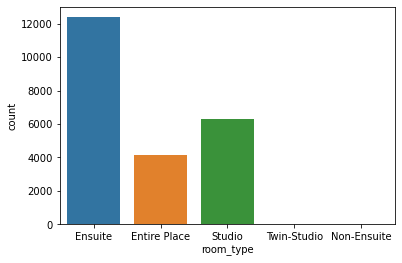

In [89]:
sns.countplot(data=df, x='room_type')

In [68]:
df['room_type'].isna().sum()

23481

In [69]:
df[df.room_type.isna()].status.value_counts(1),df[df.room_type.isna()==False].status.value_counts(1)

(0    0.931391
 1    0.068609
 Name: status, dtype: float64,
 0    0.935994
 1    0.064006
 Name: status, dtype: float64)

In [70]:
room_type_mode=df.room_type.mode()[0]
df['room_type'].fillna(room_type_mode,inplace=True)

In [71]:
imp_cols=['Agent_id', 'budget', 'lease', 'source', 'source_city', 'utm_medium',
       'des_city', 'des_country', 'room_type']

In [72]:
for col in imp_cols:
    print(col,df[col].nunique())

Agent_id 120
budget 6
lease 7
source 16
source_city 57
utm_medium 64
des_city 53
des_country 15
room_type 5


In [73]:
df.utm_source.fillna('unavailable', inplace=True)

In [74]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [75]:
X=df[imp_cols]
Y=df['status']

In [76]:
X=pd.get_dummies(X)


In [77]:
X.shape

(46307, 343)

In [78]:
Y.value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [79]:
Y.shape,Y.sum()

((46307,), 3072)

In [80]:
train_X,test_X,train_y,test_y= train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=22)

In [81]:
model_lr=LogisticRegression(max_iter=1000)

In [82]:
model_lr.fit(train_X,train_y)

LogisticRegression(max_iter=1000)

In [83]:
model_lr.score(test_X,test_y)

0.9345713668754049

In [84]:
y_pred=model_lr.predict(test_X)


In [85]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4324
           1       0.61      0.04      0.07       307

    accuracy                           0.93      4631
   macro avg       0.77      0.52      0.52      4631
weighted avg       0.91      0.93      0.91      4631



In [86]:
accuracy_score(test_y,y_pred),precision_score(test_y,y_pred),recall_score(test_y,y_pred),f1_score(test_y,y_pred)

(0.9345713668754049,
 0.6111111111111112,
 0.035830618892508145,
 0.06769230769230769)

In [88]:
majority_df=df[df.status==0]
minority_df=df[df.status==1]

In [90]:
X=df[imp_cols]
X=pd.get_dummies(X)
y=df['status']
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [91]:
X.shape

(86470, 343)

In [93]:
y.value_counts()

0    43235
1    43235
Name: status, dtype: int64

In [96]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.1, random_state=22)
model_lr=LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(train_X,train_y)
y_pred=model_lr.predict(test_X)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4334
           1       0.99      0.92      0.95      4313

    accuracy                           0.96      8647
   macro avg       0.96      0.96      0.96      8647
weighted avg       0.96      0.96      0.96      8647



# Now we can use the proba function to find out the probability of a client going through the lease and will use the same value as our score to mark our customers

In [217]:
def process_df(df):    
    df['budget'].fillna(budget_mode, inplace=True)
    df['budget']=df['budget'].apply(assign_budget)
    df['utm_medium'].fillna('unavailable', inplace=True)
    df['lease'].fillna('unavailable', inplace=True)
    df['lease']=df['lease'].apply(categorize_lease_term)
    df['des_city'].fillna('unavailable', inplace=True)
    other_des_cities=df.des_city.value_counts()[df.des_city.value_counts().values<100].index
    df['des_city']=list(map(lambda x: 'Other des cities' if x in other_des_cities else x, df['des_city']))
    df['des_country'].fillna('unavailable', inplace=True)
    df['source_city'].fillna('unavailable', inplace=True)
    other_source_cities=df['source_city'].value_counts()[df['source_city'].value_counts().values<100].index
    df['source_city']=list(map(lambda x: 'Other Source Cities' if x in other_source_cities else x, df['source_city']))
    df['source']=list(map(lambda x: 'Other Sources' if x in other_sources else x, df['source']))
    df.utm_source.fillna('unavailable', inplace=True)
    return df

In [218]:
df=pd.read_csv('Data_Science_Internship - Dump.csv', index_col=0)

In [219]:
encoded_df=process_df(df)

In [220]:
encoded_df.nunique()

Agent_id            120
status                6
lost_reason          30
budget                6
lease                 7
movein              477
source               16
source_city          58
source_country      186
utm_source           35
utm_medium           64
des_city             53
des_country          15
room_type             5
lead_id           30574
dtype: int64

In [221]:
encoded_df=encoded_df[imp_cols]

In [222]:
encoded_df.nunique()

Agent_id       120
budget           6
lease            7
source          16
source_city     58
utm_medium      64
des_city        53
des_country     15
room_type        5
dtype: int64

In [223]:
encoded_df=pd.get_dummies(encoded_df[imp_cols])

In [224]:
model_lr.predict_proba(encoded_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- des_city_9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0
- des_country_9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0
- source_9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0
- source_city_467f29d648705d956b83aed4843decf448186a68a2ae1ed0fe77698815239fd8
- source_city_9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0
- ...
Feature names seen at fit time, yet now missing:
- des_city_unavailable
- des_country_unavailable
- source_city_unavailable
- source_unavailable
- utm_medium_unavailable

  warnings.warn(message, FutureWarning)


ValueError: X has 344 features, but LogisticRegression is expecting 343 features as input.

In [123]:
score=[]

In [124]:
score=[model_lr.predict_proba(encoded_df)[i][1] for i in range(df.shape[0])]

KeyboardInterrupt: 

In [128]:
pred=model_lr.predict_proba(encoded_df)

In [129]:
pred.shape

(46307, 2)

In [131]:
pred

array([[0.99835599, 0.00164401],
       [0.97063675, 0.02936325],
       [0.88074644, 0.11925356],
       ...,
       [0.97369586, 0.02630414],
       [0.99602184, 0.00397816],
       [0.92500189, 0.07499811]])

In [148]:
pred[:][1][1]

0.029363253996635082

In [163]:
df['score']=[round(pred[i][1]*100,2) for i in range(pred.shape[0])]

In [160]:
score

[0.16,
 2.94,
 11.93,
 12.91,
 0.51,
 1.65,
 3.64,
 4.83,
 2.72,
 26.76,
 0.01,
 24.82,
 9.7,
 3.1,
 4.02,
 2.75,
 0.05,
 2.61,
 18.42,
 0.06,
 19.58,
 0.01,
 3.9,
 26.23,
 17.73,
 2.49,
 1.37,
 0.0,
 0.01,
 0.33,
 29.23,
 1.87,
 1.23,
 9.56,
 1.93,
 0.01,
 0.27,
 0.01,
 6.72,
 8.94,
 4.07,
 0.6,
 0.98,
 0.01,
 1.18,
 6.55,
 9.46,
 0.86,
 0.0,
 0.01,
 0.0,
 2.74,
 0.35,
 1.55,
 0.89,
 4.91,
 21.79,
 0.06,
 0.31,
 0.01,
 0.48,
 0.26,
 0.36,
 0.08,
 1.3,
 0.01,
 0.97,
 0.0,
 1.0,
 6.2,
 0.0,
 1.05,
 0.05,
 0.28,
 0.0,
 12.59,
 0.85,
 12.94,
 0.01,
 2.31,
 0.08,
 0.06,
 1.92,
 0.08,
 9.93,
 0.29,
 3.26,
 14.27,
 5.06,
 0.13,
 9.22,
 1.05,
 3.8,
 3.37,
 4.19,
 3.71,
 6.3,
 5.61,
 32.25,
 0.59,
 12.71,
 0.28,
 7.95,
 22.63,
 3.92,
 0.01,
 0.71,
 1.47,
 5.54,
 21.09,
 11.28,
 19.59,
 4.11,
 1.1,
 51.4,
 0.03,
 0.01,
 10.31,
 4.37,
 1.92,
 1.6,
 0.01,
 2.55,
 5.99,
 14.48,
 5.82,
 6.61,
 1.64,
 15.84,
 0.05,
 7.15,
 0.94,
 2.52,
 0.31,
 1.08,
 3.56,
 0.02,
 0.75,
 0.57,
 7.88,
 8.28,
 15.65,


In [162]:
max(score)

92.14

In [121]:
for i in range(1000):
    print(round(model_lr.predict_proba(encoded_df)[i][1],2))

0.0
0.03
0.12
0.13
0.01
0.02
0.04
0.05
0.03
0.27
0.0
0.25
0.1
0.03
0.04
0.03
0.0
0.03
0.18
0.0
0.2
0.0
0.04
0.26
0.18
0.02
0.01
0.0
0.0
0.0
0.29
0.02
0.01
0.1
0.02
0.0
0.0
0.0
0.07
0.09
0.04
0.01
0.01
0.0
0.01
0.07
0.09
0.01
0.0
0.0
0.0
0.03
0.0
0.02
0.01
0.05
0.22
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.01
0.0
0.01
0.06
0.0
0.01
0.0
0.0
0.0
0.13
0.01
0.13
0.0
0.02
0.0
0.0
0.02
0.0
0.1
0.0
0.03
0.14
0.05
0.0
0.09
0.01
0.04
0.03
0.04
0.04
0.06
0.06
0.32
0.01
0.13
0.0
0.08
0.23
0.04
0.0
0.01
0.01
0.06
0.21
0.11
0.2
0.04
0.01
0.51
0.0
0.0
0.1
0.04
0.02
0.02
0.0
0.03
0.06
0.14
0.06
0.07
0.02
0.16
0.0
0.07
0.01
0.03
0.0
0.01
0.04
0.0
0.01
0.01
0.08
0.08
0.16
0.03
0.0
0.0
0.19
0.04
0.04
0.0
0.06
0.01
0.09
0.08
0.06
0.03
0.02
0.0
0.0
0.01
0.01
0.43
0.08
0.1
0.03
0.13
0.21
0.06
0.06
0.17
0.17
0.12
0.06
0.09
0.0
0.0
0.07
0.01
0.01
0.03
0.0
0.23
0.03
0.07
0.11
0.01
0.17
0.09
0.15
0.06
0.01
0.07
0.09
0.17
0.61
0.61
0.06
0.0
0.02
0.02
0.04
0.04
0.01
0.04
0.46
0.06
0.1
0.04
0.03
0.04
0.07
0.15
0.09


In [94]:
def train_model(cols):
    
    model_lr=LogisticRegression(solver='lbfgs', max_iter=1000)
    model_lr.fit(train_X,train_y)
    y_pred=model_lr.predict(test_X)
    print(classification_report(test_y,y_pred))

In [67]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [68]:
train_model(['budget', 'lease','room_type'])

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.35      0.02      0.04       307

    accuracy                           0.93      4631
   macro avg       0.64      0.51      0.50      4631
weighted avg       0.90      0.93      0.90      4631



In [69]:
train_model(['budget', 'lease','room_type', 'des_city'])

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.35      0.02      0.04       307

    accuracy                           0.93      4631
   macro avg       0.64      0.51      0.50      4631
weighted avg       0.90      0.93      0.90      4631



In [70]:
train_model(['budget', 'lease','room_type', 'source_country'])

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.35      0.02      0.04       307

    accuracy                           0.93      4631
   macro avg       0.64      0.51      0.50      4631
weighted avg       0.90      0.93      0.90      4631



In [71]:
train_model(['Agent_id','budget', 'lease','source_city', 'source_country','des_city', 'des_country', 'room_type'])

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.35      0.02      0.04       307

    accuracy                           0.93      4631
   macro avg       0.64      0.51      0.50      4631
weighted avg       0.90      0.93      0.90      4631



In [72]:
def train_models(cols, algo):
    X=df[cols]
    X=pd.get_dummies(X)
    Y=df['status']
    model_lr=algo()
    model_lr.fit(train_X,train_y)
    y_pred=model_lr.predict(test_X)
    print(classification_report(test_y,y_pred))

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
train_models(['budget', 'lease','room_type'],GradientBoostingClassifier)


              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.50      0.01      0.03       307

    accuracy                           0.93      4631
   macro avg       0.72      0.51      0.50      4631
weighted avg       0.91      0.93      0.90      4631



In [74]:
train_models(['Agent_id','budget', 'lease','source_city', 'source_country','des_city', 'des_country', 'room_type'],GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.50      0.01      0.03       307

    accuracy                           0.93      4631
   macro avg       0.72      0.51      0.50      4631
weighted avg       0.91      0.93      0.90      4631



In [75]:
train_models(['budget', 'lease','des_city', 'room_type'],GradientBoostingClassifier)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4324
           1       0.56      0.02      0.03       307

    accuracy                           0.93      4631
   macro avg       0.75      0.51      0.50      4631
weighted avg       0.91      0.93      0.90      4631



In [76]:
df

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,unavailable,unavailable,NaN,NaN,unavailable,unavailable,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,unavailable,unavailable,NaN,NaN,unavailable,unavailable,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,121-180,9 months - 1 year,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-60,less than 3 months,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,Other Source Cities,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,unavailable,unavailable,NaN,NaN,unavailable,unavailable,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,unavailable,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,0,Low availability,61-120,1 year or more,01/09/22,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,0,Semester stay,61-120,less than 3 months,29/09/22,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,0,Low availability,240-300,9 months - 1 year,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,0,Low availability,>300,1 year or more,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,Other Source Cities,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f56670671

In [77]:
df.lead_id.nunique()

30491

In [78]:
df_majority=df[df.status==0]
df_minority=df[df.status==1]

In [79]:
df_majority.shape

(43235, 15)

In [81]:
df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [87]:
cols=df.columns
for col in cols:
    print('\n',col,'\n', 'majority dataset')
    print(df_majority[col].nunique())
    print('minority_dataset')
    print(df_minority[col].nunique())


 Agent_id 
 majority dataset
120
minority_dataset
73

 status 
 majority dataset
1
minority_dataset
1

 lost_reason 
 majority dataset
30
minority_dataset
0

 budget 
 majority dataset
7
minority_dataset
7

 lease 
 majority dataset
7
minority_dataset
7

 movein 
 majority dataset
466
minority_dataset
124

 source 
 majority dataset
637
minority_dataset
168

 source_city 
 majority dataset
57
minority_dataset
56

 source_country 
 majority dataset
36
minority_dataset
36

 utm_source 
 majority dataset
33
minority_dataset
24

 utm_medium 
 majority dataset
63
minority_dataset
31

 des_city 
 majority dataset
53
minority_dataset
48

 des_country 
 majority dataset
14
minority_dataset
5

 room_type 
 majority dataset
5
minority_dataset
3

 lead_id 
 majority dataset
29425
minority_dataset
3005
